# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('affair_data.csv')
#data.head()

In [6]:
#data.info()

In [7]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [8]:
X = data[data.columns[:-1]]
#X.head(2)

In [9]:
Y = data['affair']

In [10]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [12]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [13]:
predictions = model.predict_proba(X_test)

In [14]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [15]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [17]:
#for i in range(10):
#    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
#    model = LogisticRegression()
#    model.fit(X_train, Y_train)
#    print("{}: {}".format(i, model.score(X_test, Y_test)))

### Оценка качества модели

Считаем accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [20]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [21]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [22]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [23]:
# посмотрим что получилось
#for line in zip( pr, re, thres ):
#    print( line )

In [24]:
from sklearn.metrics import average_precision_score

In [25]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [26]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [27]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [131]:
#for line in zip( fpr, tpr, thres ):
#    print( line )

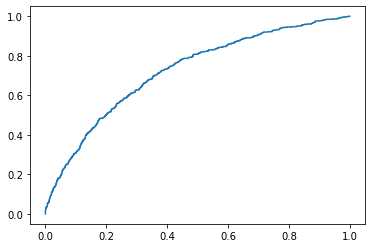

In [30]:
import matplotlib.pyplot as plt
plt.plot( fpr, tpr )

In [ ]:
###------------------------------------------------------------------------------------------------

In [ ]:
###------------------------------- tpr, fpr, ROC своими руками ------------------------------------

In [112]:
import numpy as np

#tpr, fpr
def tpr_fpr(Y, Y_positive_prob, threshold = 0.5):
    tp, tn, fp, fn = 0, 0, 0, 0
    for y, y_positive_prob in zip(Y, Y_positive_prob):
        if y == 1 and y_positive_prob >= threshold: tp += 1
        if y == 0 and y_positive_prob < threshold: tn += 1
        if y == 1 and y_positive_prob < threshold: fn += 1
        if y == 0 and y_positive_prob >= threshold: fp += 1
    #считаю accuracy, precision, recall(tpr), fpr
    try:
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        accuracy = (tp + tn)/(tp + tn + fp + fn)
        precision = tp / (tp + fp)
    except ZeroDivisionError:
        precision = 0
    #возвращаю accuracy, precision, recall(tpr), fpr
    return tp, tn, fp, fn, accuracy, precision, tpr, fpr

#ROC
def roc(Y, Y_positive_prob, thresholds_count = 1000):
    tpr_list, fpr_list = [], []
    thresholds = np.linspace(0, 1, thresholds_count)
    for threshold in thresholds:
        tp, tn, fp, fn, acc, prec, tpr, fpr = tpr_fpr(Y, Y_positive_prob, threshold)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    #возвращаю списки значений tpr, fpr
    return thresholds, tpr_list, fpr_list

#Precision & Recall
def precision_recall(Y, Y_positive_prob, thresholds_count = 1000):
    recall_list, precision_list = [], []
    thresholds = np.linspace(0, 1, thresholds_count)
    for threshold in thresholds:
        tp, tn, fp, fn, acc, prec, tpr, fpr = tpr_fpr(Y, Y_positive_prob, threshold)
        recall_list.append(tpr)
        precision_list.append(prec)
    #возвращаю списки значений tpr, fpr
    return thresholds, recall_list, precision_list

In [110]:
#задание №1а - считаем tpr, fpr
tp, tn, fp, fn, acc, prec, tpr, fpr = tpr_fpr(Y_test, predictions[:, 1])
print(f'tpr: {tpr}, fpr: {fpr}')

tpr: 0.37649063032367974, fpr: 0.12698412698412698


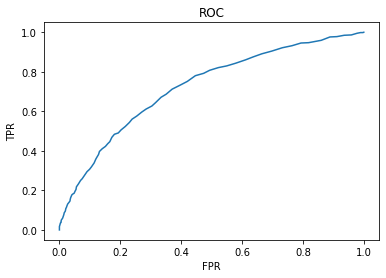

In [111]:
#задание №1б - считаем и рисуем ROC
#считаем
thresholds, tpr_list, fpr_list = roc(Y_test, predictions[:, 1], 100)
#рисуем
plt.plot(fpr_list, tpr_list)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
###----------------------------- убедились! ---------------------------------------------------------

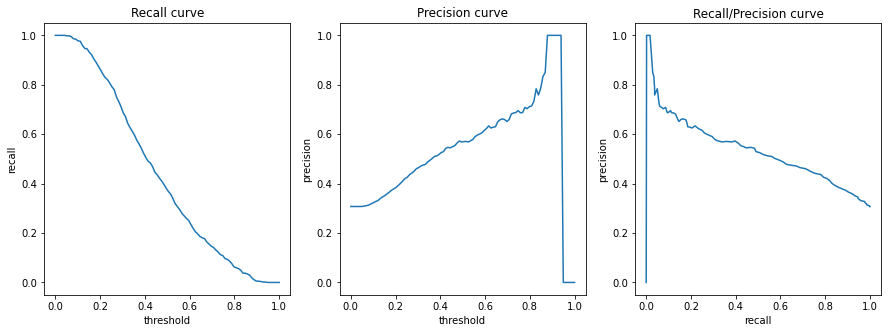

In [129]:
#задание №2 - считаем и рисуем Precision и Recall
#считаем
thresholds, recall_list, precision_list = precision_recall(Y_test, predictions[:, 1], 100)
#рисуем
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(thresholds, recall_list)
ax2.plot(thresholds, precision_list)
ax3.plot(recall_list, precision_list)
ax1.set_title('Recall curve')
ax2.set_title('Precision curve')
ax3.set_title('Recall/Precision curve')
ax1.set_xlabel('threshold')
ax1.set_ylabel('recall')
ax2.set_xlabel('threshold')
ax2.set_ylabel('precision')
ax3.set_xlabel('recall')
ax3.set_ylabel('precision')
plt.show()

In [ ]:
###-------------------------------------- The END ---------------------------------------------

**Построим еще одну модель и сравним их между собой**

In [154]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [155]:
model2 = LogisticRegression()

In [156]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [157]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predictions2 = model2.predict_proba( X_test_short )

In [159]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

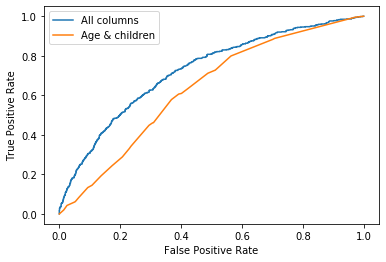

In [160]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [49]:
from sklearn.metrics import roc_curve

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [52]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [53]:
from sklearn.metrics import auc

In [54]:
auc( fpr, tpr )

0.7225943566902437

In [55]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [117]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [118]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [119]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [120]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

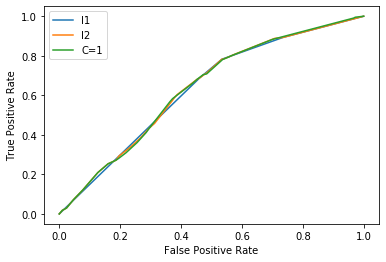

In [121]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [122]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [123]:
Y = data['affair']

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [125]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [126]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [127]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

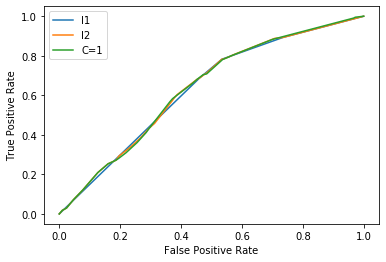

In [128]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()